# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Brady Monks

### GitHub Repo URL: https://github.com/bradymonks/web-scraping 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
article_page = requests.get('https://chiefswire.usatoday.com/2022/11/30/kansas-city-chiefs-patrick-mahomes-son-bronze-mahomes-nickname-origin-jackson-mahomes/')
article_html = article_page.text

# pickle works similar to json, but stores information in a binary format
# json files are readable by humans, pickle files, not so much

# BeautifulSoup objects don't pickle well, so it's appropriate and polite to web developers to cache the text of the web page, or just dump it to an html file you can read in later as a regular file
import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
from bs4 import BeautifulSoup
parser = 'html.parser'
soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')

In [3]:
print(article_element.get_text())














Chiefs QB Patrick Mahomes explains origin behind son's 'Bronze' nickname



			Share this article		

				22k shares
		


 
					share				



 
					tweet				



 
				text			



 
				email			



 
				link			



 




 
				on Facebook			



 
				on Twitter			



 
				via text message			



 
				on LinkedIn			



 
				via email			



 
				https://chiefswire.usatoday.com/2022/11/30/kansas-city-chiefs-patrick-mahomes-son-bronze-mahomes-nickname-origin-jackson-mahomes/			










Charles Goldman 



November 30, 2022 1:50 pm CT








Kansas City Chiefs QB Patrick Mahomes welcomed his son Patrick “Bronze” Lavon Mahomes III to the world on Monday, Nov. 28.
Speaking to reporters for the first time since the birth of his son, Mahomes spoke about the emotions and feelings of welcoming a new bundle of joy to his family alongside Brittany and Sterling.
Buy Chiefs Tickets
“It’s cool, obviously,” Mahomes said. “It’s awesome to bring in a son to add to my family. Everything w

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

In [5]:
non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)

In [6]:
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
int_tok_lower = []
for word in interesting_tokens:
    int_tok_lower.append(word.lower_)

from collections import Counter  
    
token_freq = Counter(map(str,int_tok_lower))
print(token_freq.most_common(5))

[('mahomes', 15), ('bronze', 8), ('patrick', 7), ('chiefs', 6), ('nickname', 5)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:
interesting_lemmas = [token.lemma_ for token in doc if we_care_about(token)]

int_lem_lower = []
for word in interesting_tokens:
    int_lem_lower.append(word.lower_)

lemma_freq = Counter(int_lem_lower)
print(lemma_freq.most_common(5))

[('mahomes', 15), ('bronze', 8), ('patrick', 7), ('chiefs', 6), ('nickname', 5)]


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [8]:
sentences = list(doc.sents) 

token_words = set()
for token, freq in token_freq.most_common(5):
    token_words.add(token)

def score_sentence_by_token(sentence,interesting_tokens):
        tcount = 0
        wcount = 0
        for token in sentence:
            if token.lemma_.lower() in interesting_tokens:
                tcount += 1
            wcount +=1
        sent_str = str(sentence).replace('\n','').replace('  ',' ')
        print(round(tcount/wcount,2),':', sent_str)

In [9]:
score_sentence_by_token(sentences[13],token_words)

0.06 : I always thought (the nickname) was going to be ‘Tre’ as the third.


In [10]:
sentences = list(doc.sents) 

lemmas_words = set()
for lemma, freq in lemma_freq.most_common(5):
    lemmas_words.add(lemma)

def score_sentence_by_lemmas(sentence,interesting_lemmas):
        lcount = 0
        wcount = 0
        for token in sentence:
            if token.lemma_.lower() in interesting_lemmas:
                lcount += 1
            wcount +=1
        # because there's a bunch of junk newlines, we'll replace those with nothing, as well as a little bit of whitespace
        sent_str = str(sentence).replace('\n','').replace('  ',' ')
        print(round(lcount/wcount,4),':', sent_str)

In [11]:
score_sentence_by_lemmas(sentences[1],lemmas_words)

0.027 : Speaking to reporters for the first time since the birth of his son, Mahomes spoke about the emotions and feelings of welcoming a new bundle of joy to his family alongside Brittany and Sterling.


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [12]:
tscores = []
for sentence in sentences:
    tcount = 0
    wcount = 0
    for token in sentence:
        if token in token_words:
            tcount += 1
        wcount +=1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    tscores.append(round(tcount/wcount,3))
    

In [13]:
print(tscores)

[0.13, 0.03, 0.12, 0.0, 0.06, 0.0, 0.13, 0.11, 0.04, 0.0, 0.04, 0.14, 0.0, 0.06, 0.0, 0.07, 0.0, 0.0, 0.08, 0.06, 0.09, 0.09, 0.5, 0.08, 0.11, 0.0, 0.06, 0.0, 0.0, 0.02, 0.02, 0.0, 0.0]


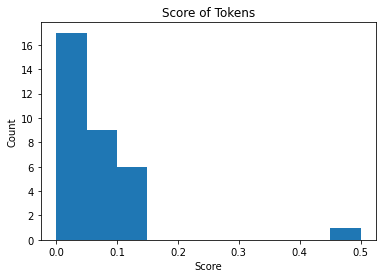

In [14]:
import matplotlib.pyplot as plt
plt.hist(tscores)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score of Tokens')
plt.show()

### All but one score is under 0.2. You can tell that for the most part, the words don't show up often.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [15]:
lscores = []
for sentence in sentences:
    lcount = 0
    wcount = 0
    for token in sentence:
        if token.lemma_.lower() in lemmas_words:
            lcount += 1
        wcount +=1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    lscores.append(round(lcount/wcount,2))
print(lscores)

[0.13, 0.03, 0.12, 0.0, 0.06, 0.0, 0.13, 0.11, 0.04, 0.0, 0.04, 0.14, 0.0, 0.06, 0.0, 0.07, 0.0, 0.0, 0.08, 0.06, 0.09, 0.09, 0.5, 0.08, 0.11, 0.0, 0.06, 0.0, 0.0, 0.02, 0.02, 0.0, 0.0]


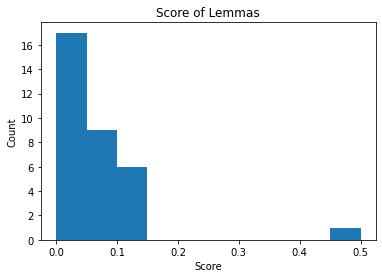

In [16]:
import matplotlib.pyplot as plt
plt.hist(lscores)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score of Lemmas')
plt.show()

### Scores seem to be under .1, with the majority even below 0.05

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

### If we only wanted to consider nouns, then I don't believe any of my words would be omitted. 'Patrick', 'Mahomes', 'Bronze', and 'Chiefs' are all names and 'nickname' is a noun. Spacy has a function called .noun_chunks, using this we could find the nouns and then run the counter function on that array of text. 